/var/folders/jz/7qq_d8k50sl6vy283q9cv0jr0000gn/T/ipykernel_26477/3170669396.py:8: RuntimeWarning: invalid value encountered in scalar power
  f = lambda t: (t**((2 * n + 1) / 7)).real


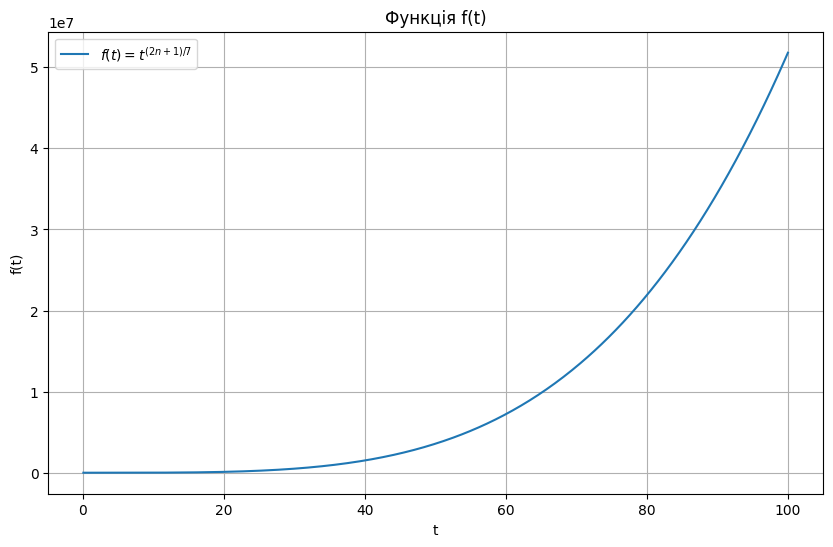

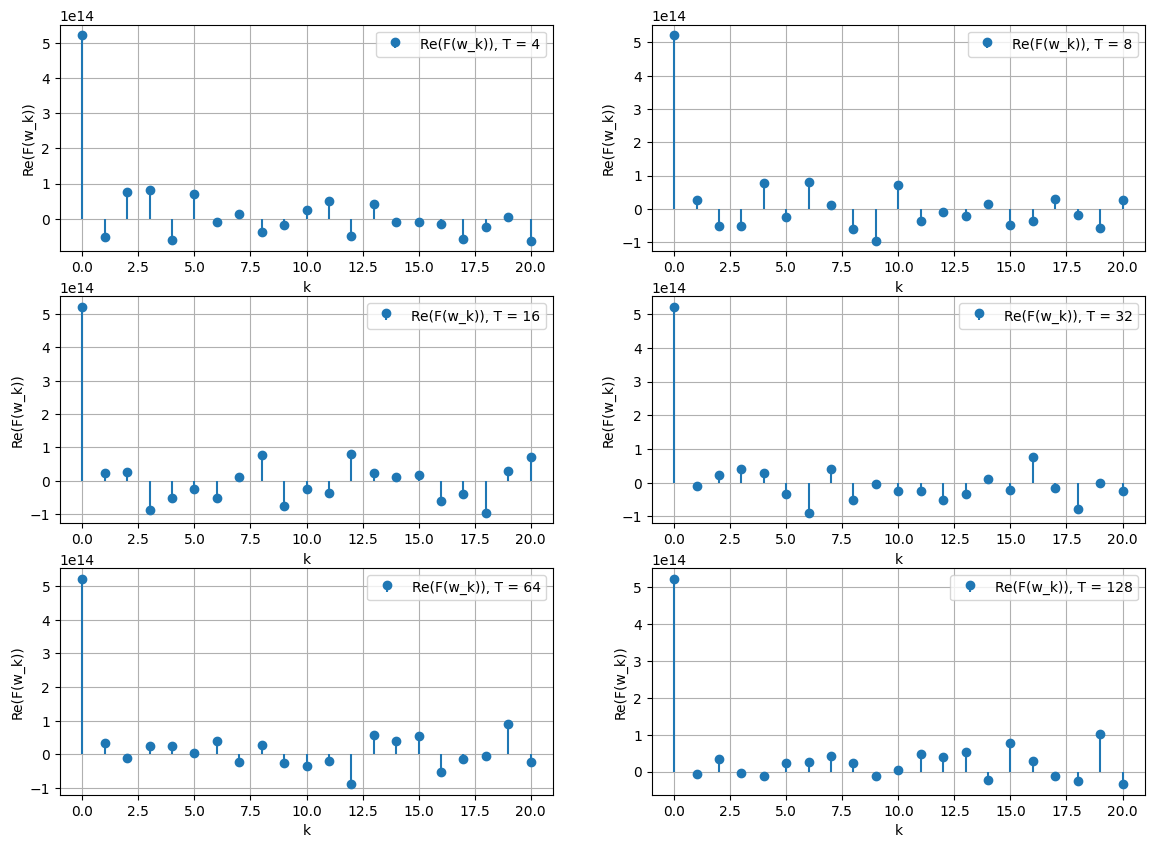

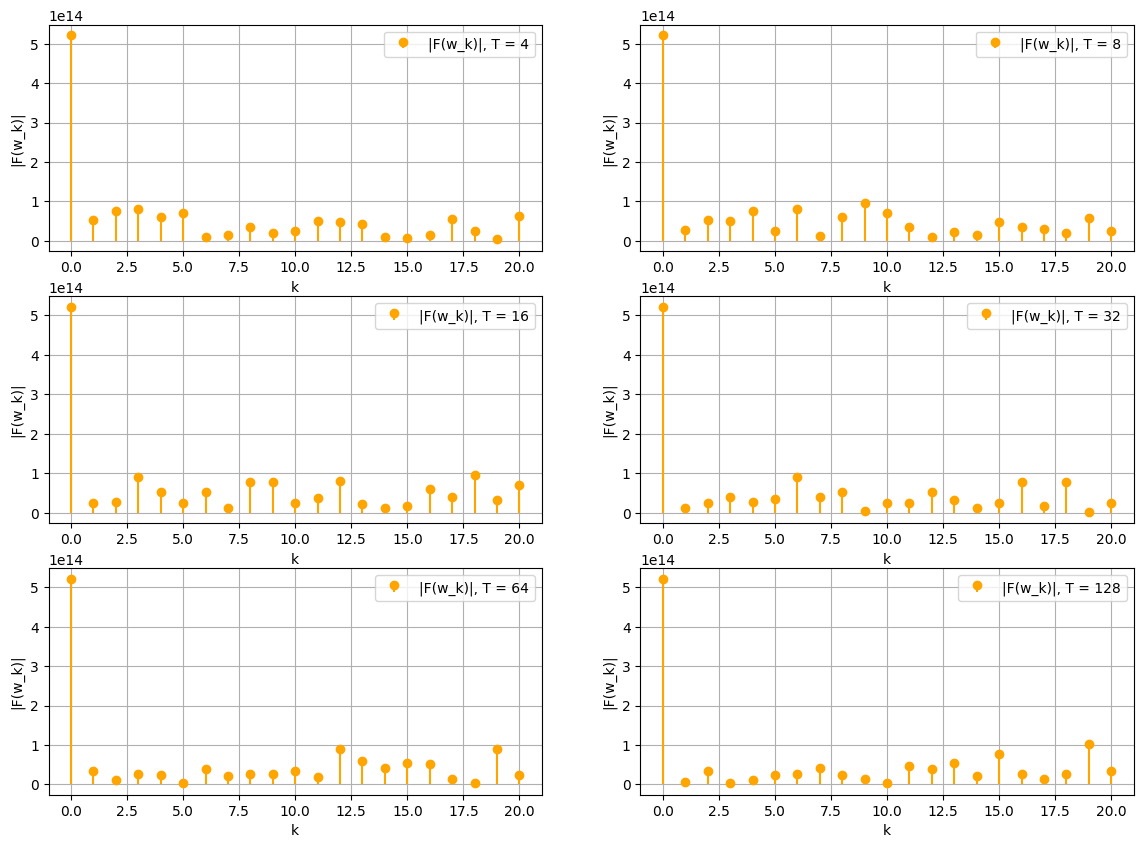

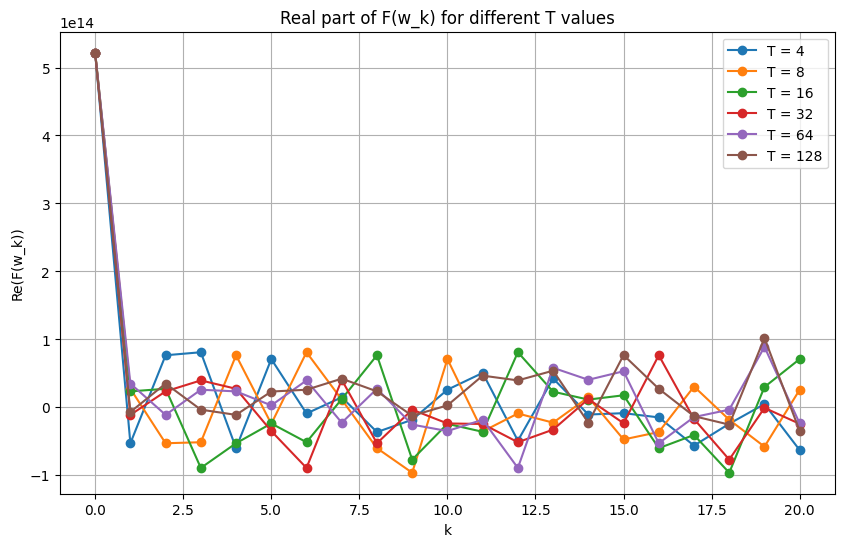

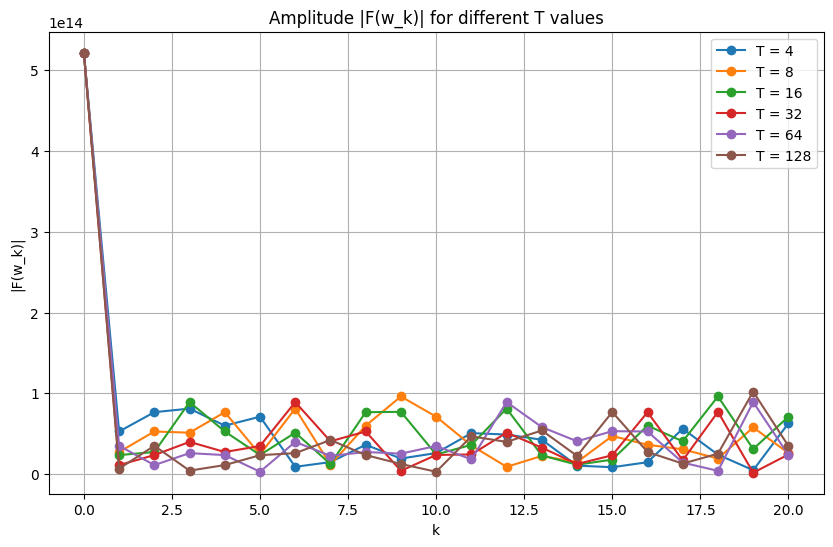

In [8]:
from mpmath import quad as mpmath_quad, cos, sin, mpf
import numpy as np
import matplotlib.pyplot as plt

n = 13
N = 100 * n

f = lambda t: (t**((2 * n + 1) / 7)).real

def F(wk):
    wk = mpf(wk)
    N_mpf = mpf(N)

    def real_integrand(t):
        t = mpf(t)
        return f(t) * cos(-wk * mpf(np.pi) * t)

    def imag_integrand(t):
        t = mpf(t)
        return f(t) * sin(-wk * mpf(np.pi) * t)

    real = mpmath_quad(real_integrand, [-N_mpf, N_mpf])
    imag = mpmath_quad(imag_integrand, [-N_mpf, N_mpf])

    return real, imag

specter = lambda real, imag: np.sqrt(real**2 + imag**2)

def main():
    t_values = np.linspace(-100, 100, 1000)
    f_values = [f(t) for t in t_values]

    plt.figure(figsize=(10, 6))
    plt.plot(t_values, f_values, label="$f(t) = t^{(2n+1)/7}$")
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.title("Функція f(t)")
    plt.grid(True)
    plt.legend()
    plt.show()

    T_values = [4, 8, 16, 32, 64, 128]
    k_values = np.arange(0, 21, 1)

    fig, axes = plt.subplots(3, 2, figsize=(14, 10))
    for i, T in enumerate(T_values):
        Re_values = []
        for k in k_values:
            wk = 2 * np.pi * k / T
            real, imag = F(wk)
            Re_values.append(real)

        row, col = divmod(i, 2)
        axes[row, col].stem(k_values, Re_values, basefmt=" ",
                            label=f"Re(F(w_k)), T = {T}")
        axes[row, col].set_xlabel("k")
        axes[row, col].set_ylabel("Re(F(w_k))")
        axes[row, col].grid(True)
        axes[row, col].legend()
    plt.show()

    fig, axes = plt.subplots(3, 2, figsize=(14, 10))
    for i, T in enumerate(T_values):
        Amplitude_values = []
        for k in k_values:
            wk = 2 * np.pi * k / T
            real, imag = F(wk)
            Amplitude_values.append(specter(real, imag))

        row, col = divmod(i, 2)
        axes[row, col].stem(k_values, Amplitude_values, basefmt=" ", linefmt='orange',
                            markerfmt='o', label=f"|F(w_k)|, T = {T}")
        axes[row, col].set_xlabel("k")
        axes[row, col].set_ylabel("|F(w_k)|")
        axes[row, col].grid(True)
        axes[row, col].legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    for T in T_values:
        Re_values = [F(2 * np.pi * k / T)[0] for k in k_values]
        plt.plot(k_values, Re_values, marker='o',
                 linestyle='-', label=f"T = {T}")
    plt.xlabel("k")
    plt.ylabel("Re(F(w_k))")
    plt.title("Real part of F(w_k) for different T values")
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    for T in T_values:
        Amplitude_values = [specter(*F(2 * np.pi * k / T)) for k in k_values]
        plt.plot(k_values, Amplitude_values, marker='o',
                 linestyle='-', label=f"T = {T}")
    plt.xlabel("k")
    plt.ylabel("|F(w_k)|")
    plt.title("Amplitude |F(w_k)| for different T values")
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
